# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Fixing random state for reproducibility
np.random.seed(2360873)

In [32]:
renda = pd.read_csv('previsao_de_renda.csv')

renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

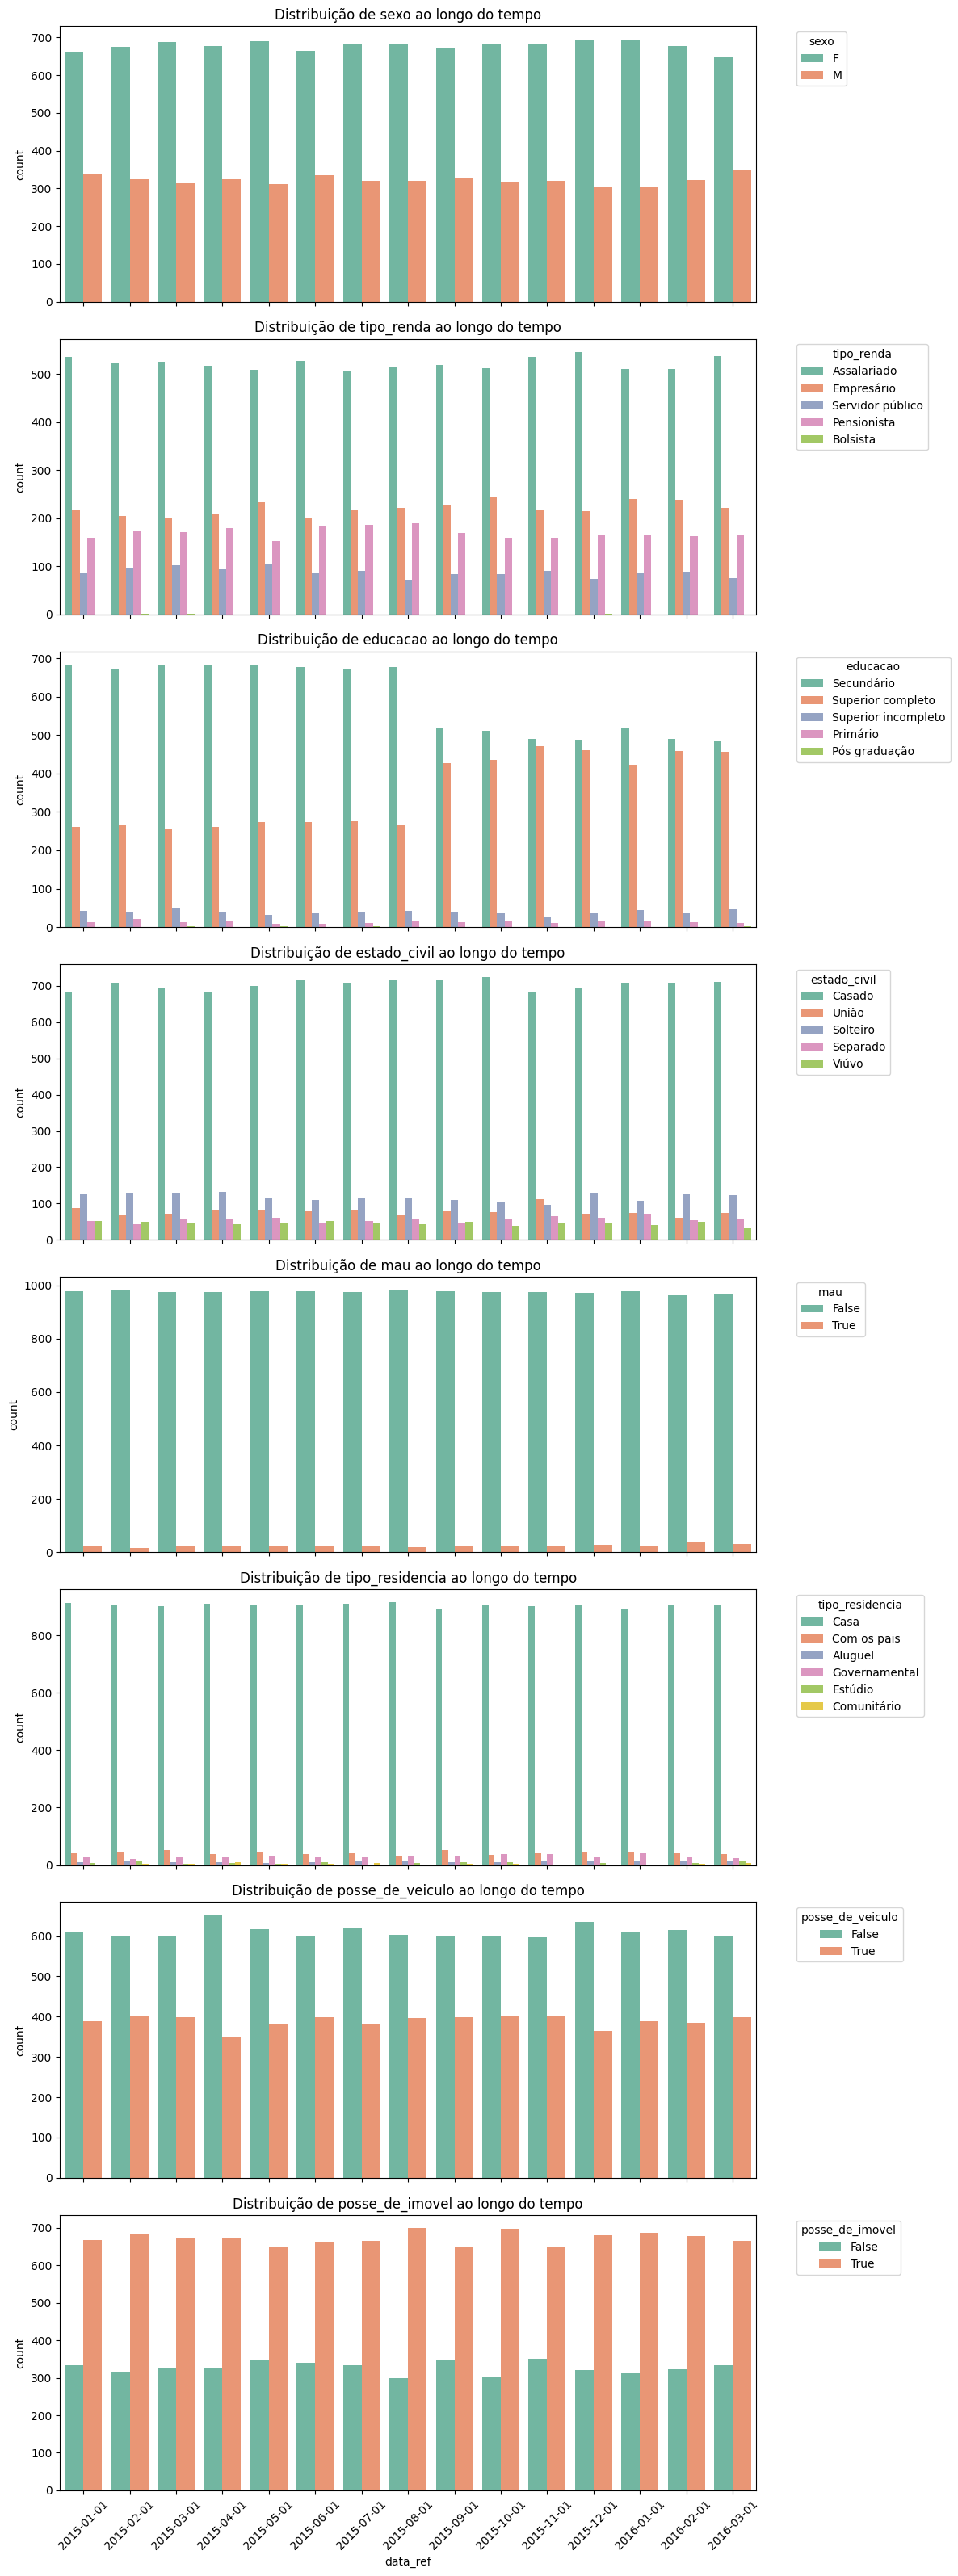

In [16]:
renda['data_ref'] = pd.to_datetime(renda['data_ref'])
variaveis_qualitativas = ['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'mau',
                          'tipo_residencia', 'posse_de_veiculo', 'posse_de_imovel']

n = len(variaveis_qualitativas)
fig, axes = plt.subplots(n, 1, figsize=(12, 4 * n), sharex=True)

for i, var in enumerate(variaveis_qualitativas):
    sns.countplot(data=renda, x='data_ref', hue=var, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Distribuição de {var} ao longo do tempo')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title=var, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Question

The distribution of  ```education``` over time proved to be inconsistent, perhaps with outliers.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

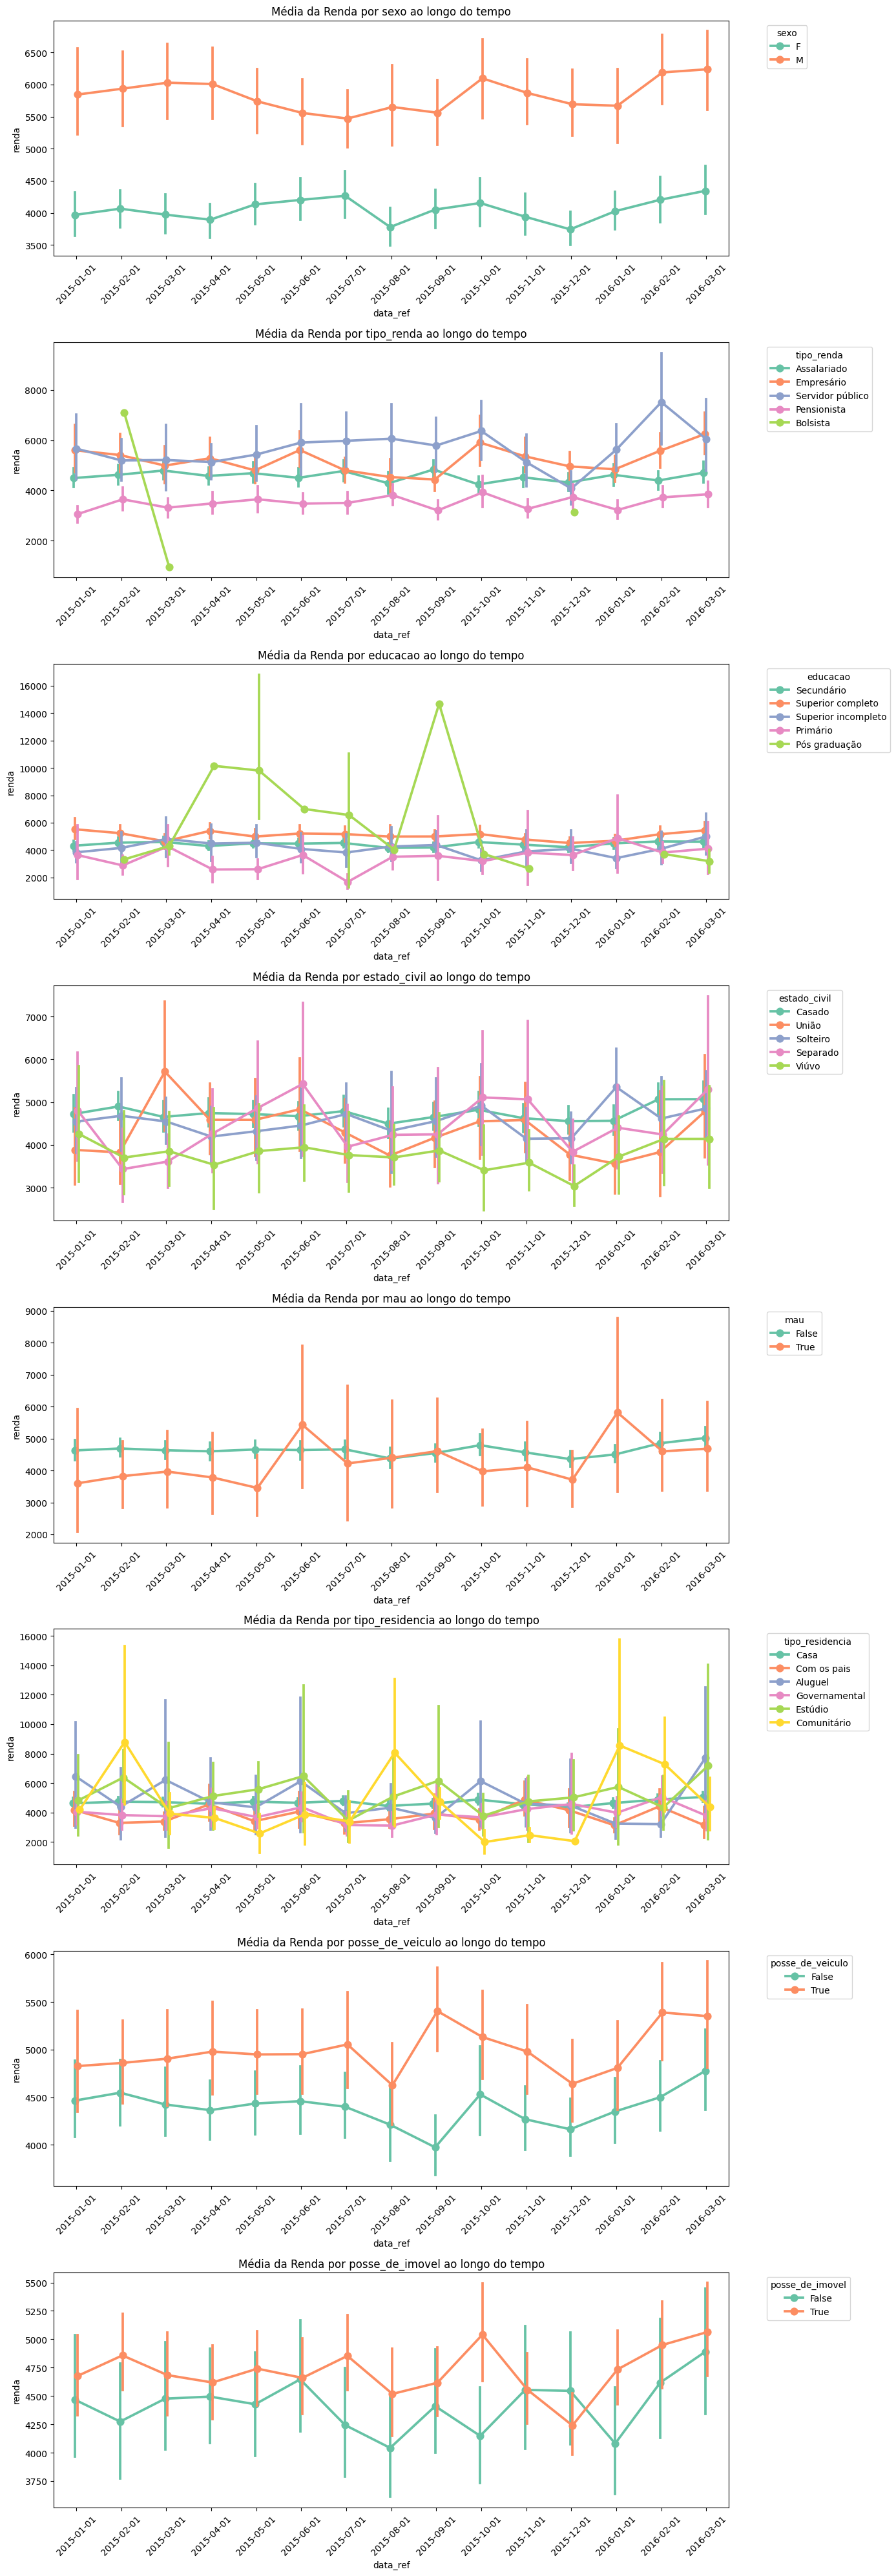

In [46]:
plt.figure(figsize=(14, 5 * len(variaveis_qualitativas)))

for i, var in enumerate(variaveis_qualitativas):
    plt.subplot(len(variaveis_qualitativas), 1, i + 1)
    sns.pointplot(data=renda, x='data_ref', y='renda', hue=var,
                  dodge=True, errorbar=('ci', 95), palette='Set2')
    plt.title(f'Média da Renda por {var} ao longo do tempo')
    plt.xticks(rotation=45)  # Isso já é o suficiente!
    plt.legend(title=var, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### Question

We've some outliers in this variables:
1) tipo_renda;
2) educacao;
3) mau;
4) tipo_residencia.

I think these variables are not reliable for modeling.